# Task 2 : To Explore Supervised Machine Learning
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

# Imports

In [19]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

In [14]:
#reading data from link

df = pd.read_csv('http://bit.ly/w-data')
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Exploratory Data Analysis

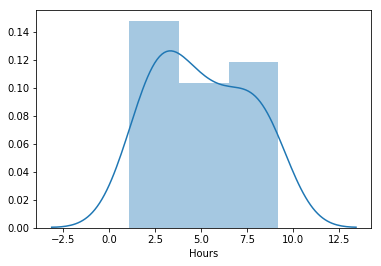

In [20]:
sns.distplot(df.Hours)

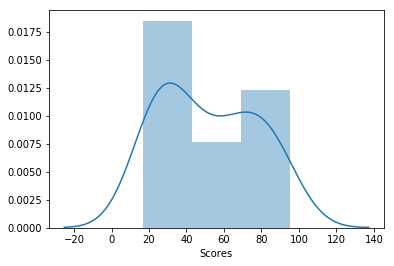

In [21]:
sns.distplot(df.Scores)

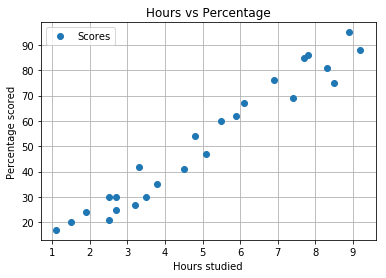

In [31]:
# Plotting the distribution of scores

df.plot(x= 'Hours',y = 'Scores',style= 'o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage scored')
plt.grid()
plt.show()

# Preparing the data


In [72]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

print(X) 
print('\n', y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]

 [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


# Train Test Split

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

# Training the Algorithm

In [74]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [75]:
m = lr.coef_
c = lr.intercept_

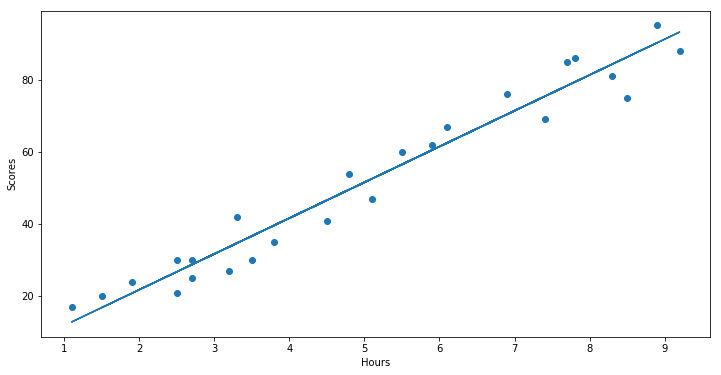

In [77]:
#Plotting Regression Line

line = m*X + c

#Plotting the test data

plt.figure(figsize=(12,6))
plt.scatter(X,y)
plt.plot(X,line)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show() 

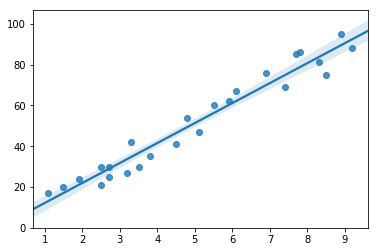

In [82]:
#Plotting test data by seaborn

sns.regplot(X,y)

# Making Prediction with our Model

In [84]:
y_pred = lr.predict(X_test) # Predicting the score
print(X_test) # Testing data - In Hours

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [86]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [96]:
#Testing with our own data

hours = [[9.25]]
own_pred = lr.predict(hours)
print("Number of hours = {}".format(hours))
print("Predicted score = {}".format(own_pred[0]))

Number of hours = [[9.25]]
Predicted score = 93.69173248737538


# Model Evaluation Metrics

In [97]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 4.183859899002975
MSE: 21.5987693072174
RMSE: 4.6474476121003665


# Conclusion

Mean Absolute Error is 4.18

Mean Squared Error is 21.59

Root Mean Squared Error is 4.64

Predicted Score of student who studies 9.25 hours is 93.69 according to simple linear regression algorithm.